# Stock Price Analysis

In this project, we will be analyzing time series data of stock prices. The dataset contains historical stock prices of various companies, including Apple (AAPL), Google (GOOGL), Microsoft (MSFT), Amazon (AMZN), Facebook (FB), and Netflix (NFLX). 

We will use Python and popular data analysis libraries such as Pandas, Matplotlib, and Seaborn to explore and visualize the data. The goal is to gain insights into the stock market trends, identify patterns, and make informed investment decisions.

The project will cover various aspects of stock price analysis, including data collection, data preprocessing, visualization, and statistical analysis. We will explore techniques such as plotting time series data, calculating moving averages, resampling data to different time frequencies, and analyzing correlations between different stocks.

By the end of this project, you will have a solid understanding of how to analyze and interpret stock price data using Python. This knowledge can be applied to real-world scenarios, such as portfolio management, risk assessment, and trend forecasting.

Let's start!

## Data Collection

- Numpy
- Pandas
- Matplotlib
- Seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob # to read multiple files

In [3]:
all_files = glob.glob(r'individual_stocks_5yr/*.csv')
print(len(all_files))

505


In [4]:
company_list = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'FB', 'NFLX']
all_data = pd.DataFrame()

for company in company_list:
    df = pd.read_csv(f'individual_stocks_5yr/{company}_data.csv', encoding='iso-8859-1', on_bad_lines='skip')
    all_data = pd.concat([all_data, df], ignore_index=True)

print(all_data.head())

         date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL


In [5]:
# all_data.describe()
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7554 entries, 0 to 7553
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    7554 non-null   object 
 1   open    7554 non-null   float64
 2   high    7554 non-null   float64
 3   low     7554 non-null   float64
 4   close   7554 non-null   float64
 5   volume  7554 non-null   int64  
 6   Name    7554 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 413.2+ KB


In [6]:
all_data.drop_duplicates(inplace=True)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7554 entries, 0 to 7553
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    7554 non-null   object 
 1   open    7554 non-null   float64
 2   high    7554 non-null   float64
 3   low     7554 non-null   float64
 4   close   7554 non-null   float64
 5   volume  7554 non-null   int64  
 6   Name    7554 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 413.2+ KB


Set index as the date since its a timeseries data.

In [7]:
all_data['date'] = pd.to_datetime(all_data['date'])
# all_data.set_index('date', inplace=True)

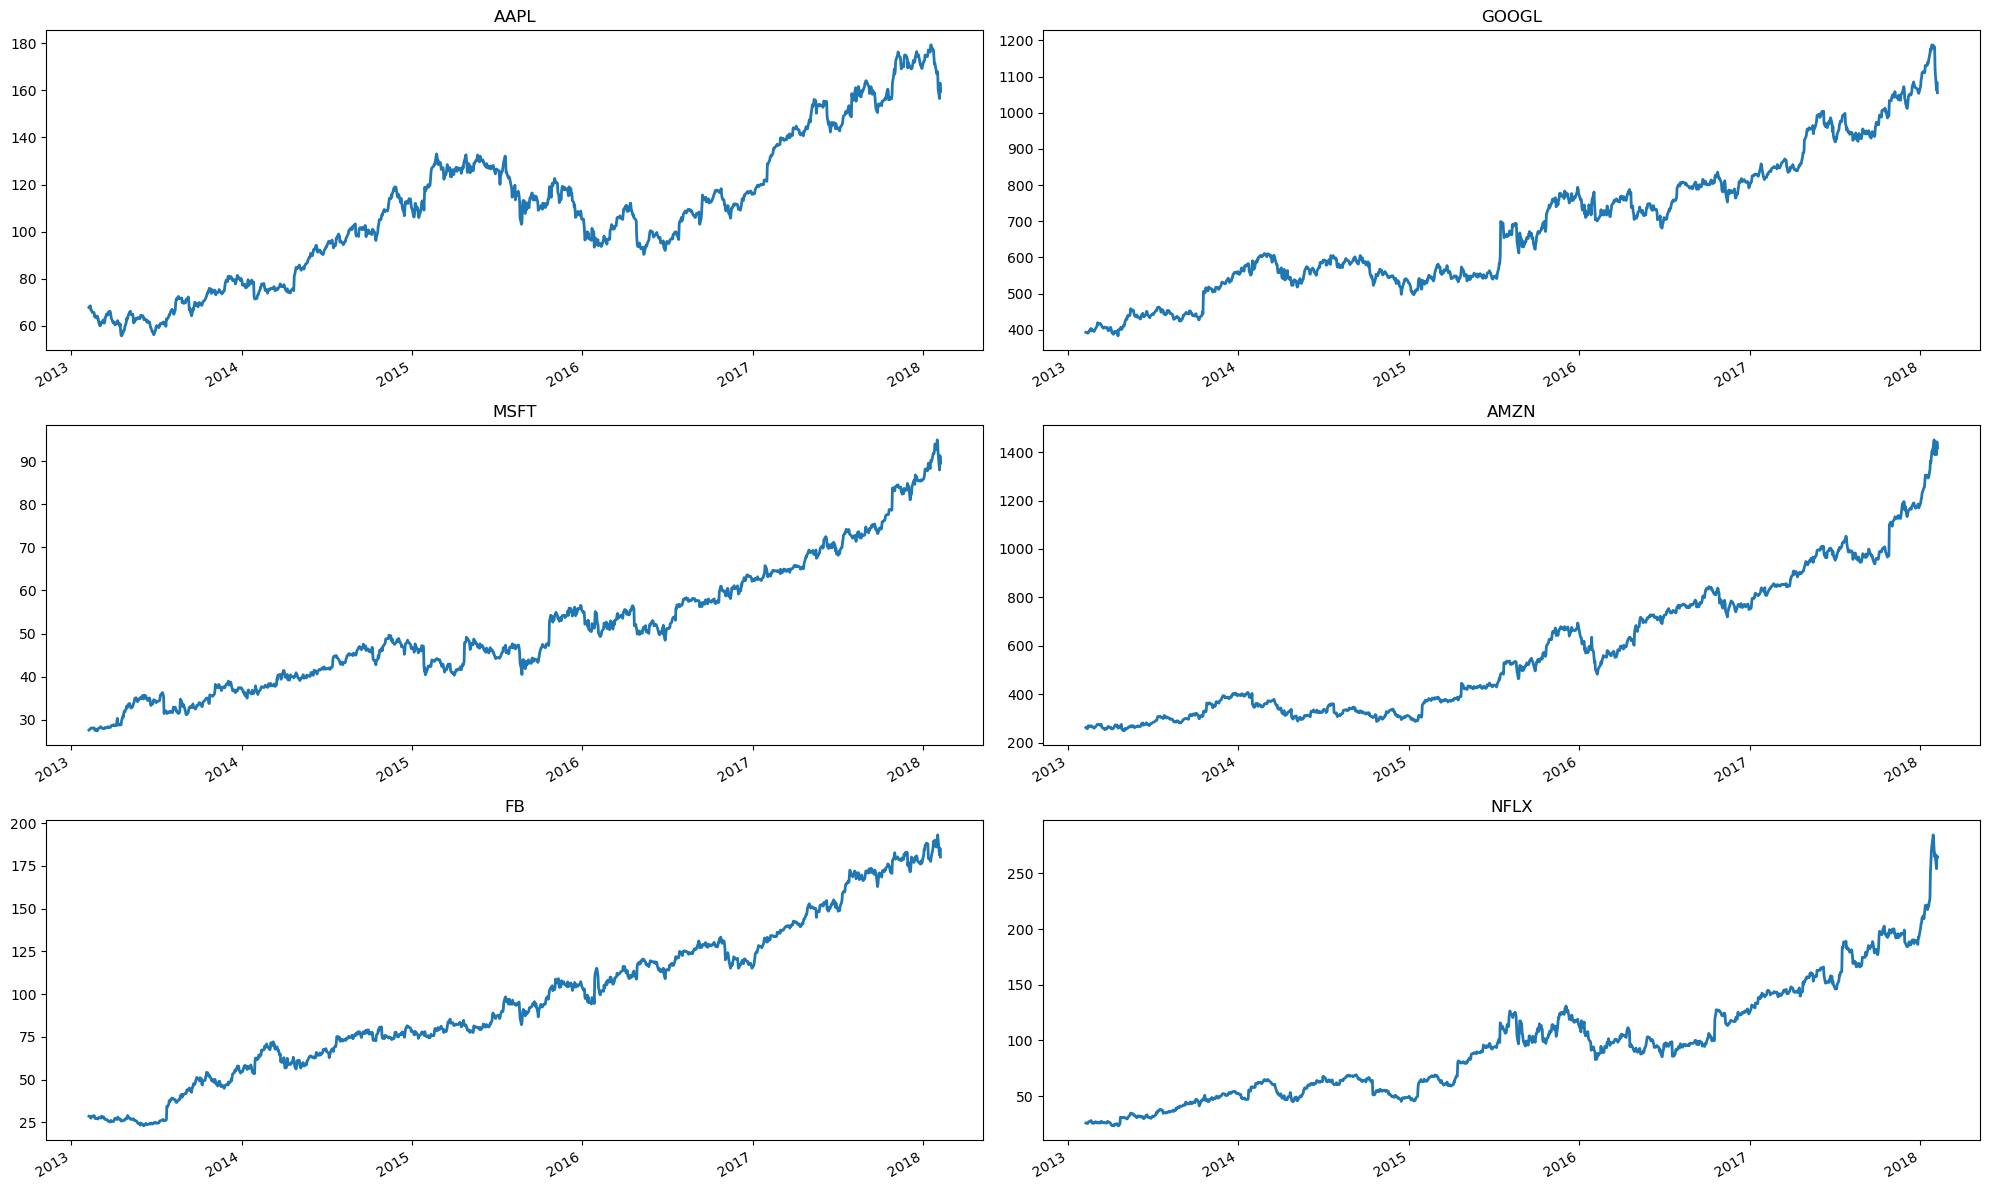

In [8]:
fig, axs = plt.subplots(3, 2, figsize=(20, 12))

for index, company in enumerate(company_list):
    df = all_data[all_data.Name == company]
    df = df[['date', 'close']]
    df.set_index('date', inplace=True)
    
    df['close'].plot(ax=axs[index//2, index%2], title=company, xlabel='', linewidth=2)

plt.tight_layout()
plt.show()

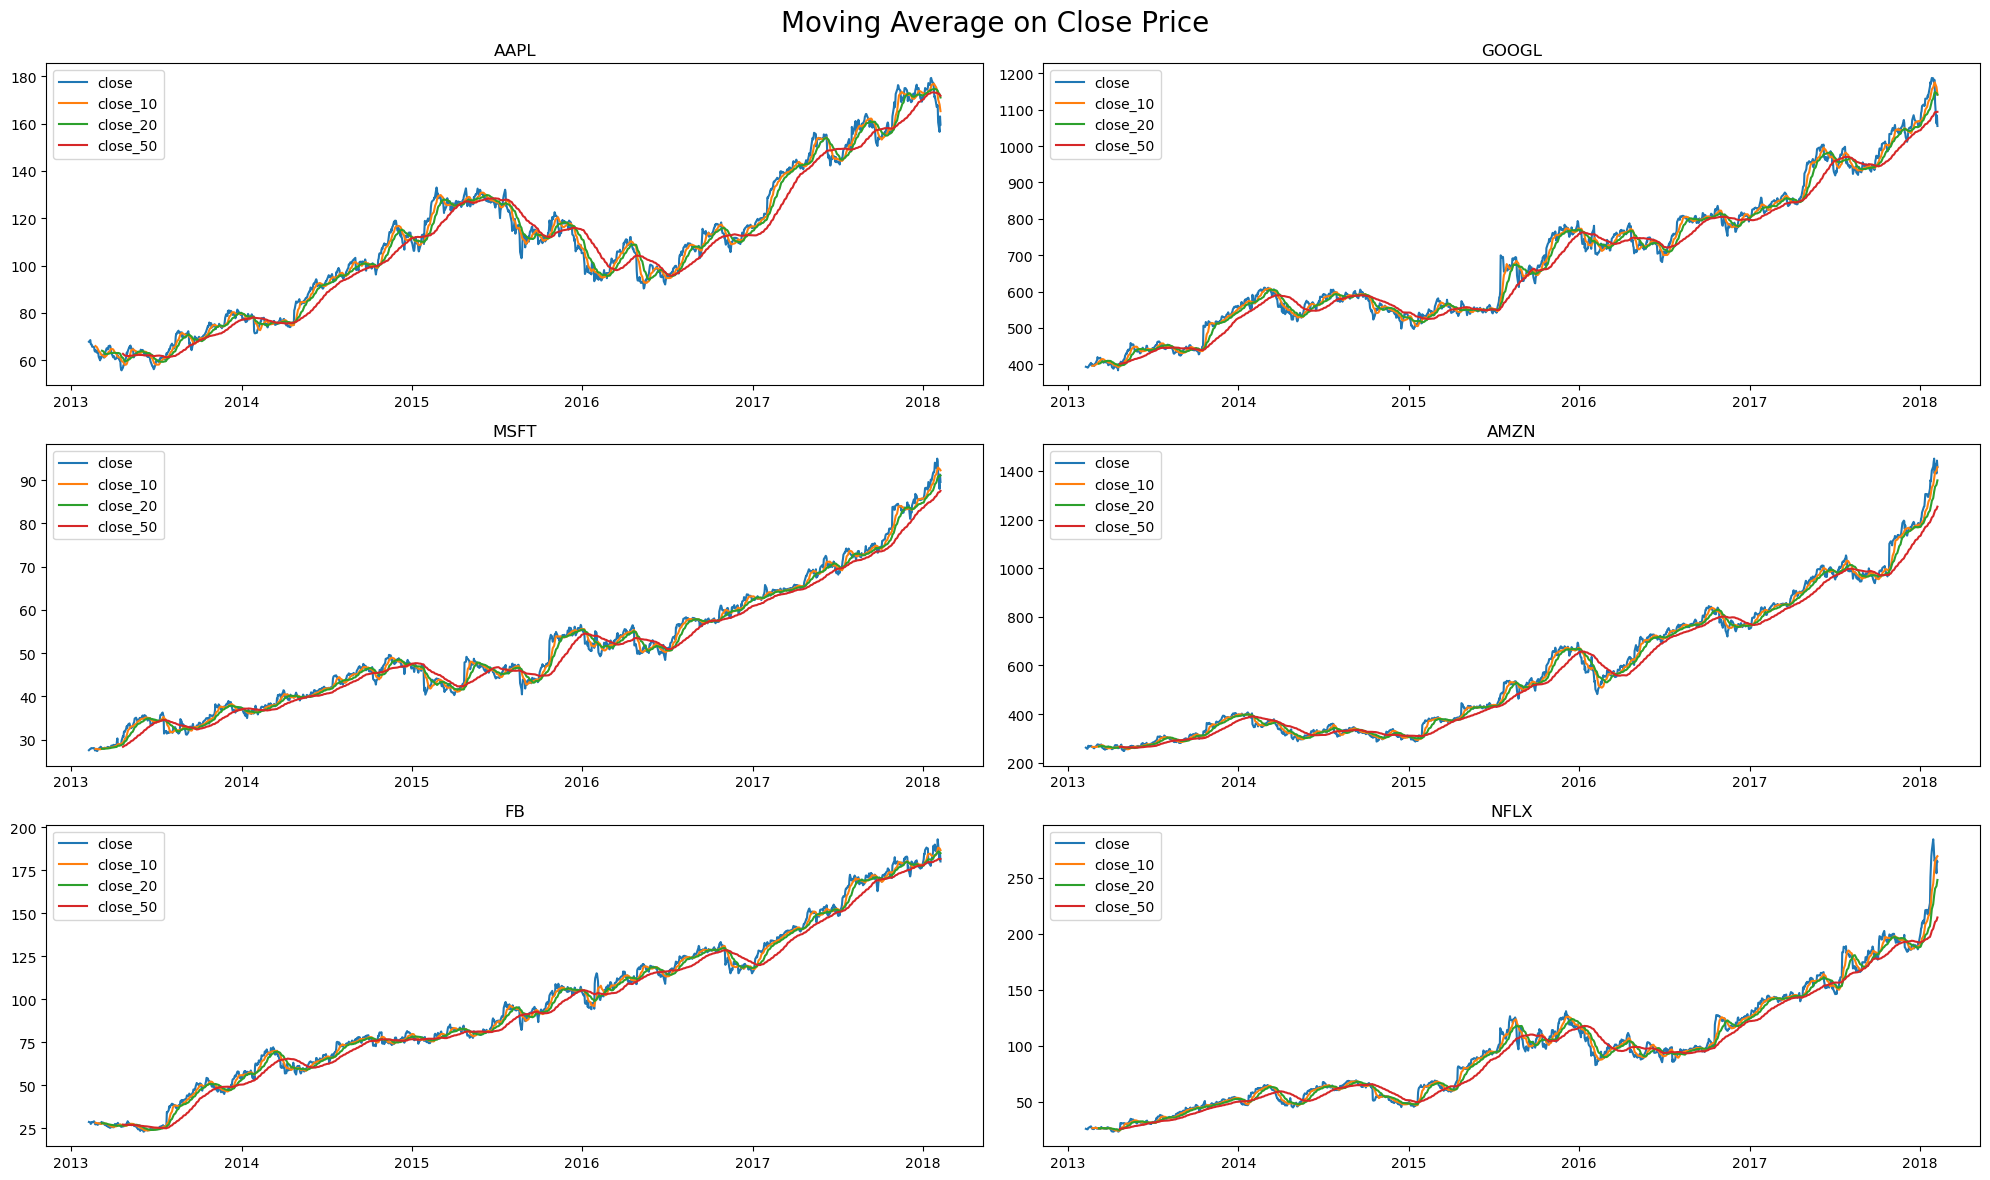

In [9]:
# Moving Average

plt.figure(figsize=(20, 12))
plt.suptitle('Moving Average on Close Price', fontsize=20)


for index, company in enumerate(company_list):
    df = all_data[all_data.Name == company]
    df = df[['date', 'close']]
    df.set_index('date', inplace=True)

    df['close_10'] = df['close'].rolling(window=10).mean()
    df['close_20'] = df['close'].rolling(window=20).mean()
    df['close_50'] = df['close'].rolling(window=50).mean()

    plt.subplot(3, 2, index+1)
    # plt.plot(df.index, df['close'], label='Close')
    # plt.plot(df.index, df['moving_average'], label='Moving Average')
    plt.plot(df, label=df.columns.values)
    plt.title(f'{company}')
    plt.legend()

plt.tight_layout()
plt.show()


C:\Users\17802\AppData\Local\Temp\ipykernel_5312\3218932704.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  apple_data_monthly = apple_data['close'].resample('M').mean()
C:\Users\17802\AppData\Local\Temp\ipykernel_5312\3218932704.py:10: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  apple_data_quarterly = apple_data['close'].resample('Q').mean()


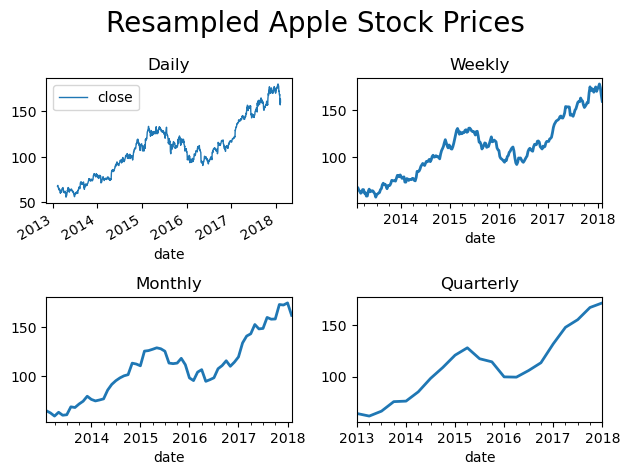

In [21]:
# Resampling

apple_data = all_data[all_data.Name == 'AAPL']
apple_data = apple_data[['date', 'close']]
apple_data.set_index('date', inplace=True)

# Resample the data to a different time frequency
apple_data_weekly = apple_data['close'].resample('W').mean()
apple_data_monthly = apple_data['close'].resample('M').mean()
apple_data_quarterly = apple_data['close'].resample('Q').mean()


# Visualize the resampled data
figure, axes = plt.subplots(2, 2)
plt.suptitle('Resampled Apple Stock Prices', fontsize=20)
apple_data.plot(ax=axes[0,0], title='Daily', linewidth=1)
apple_data_weekly.plot(ax=axes[0,1], title='Weekly', linewidth=2)
apple_data_monthly.plot(ax=axes[1,0], title='Monthly', linewidth=2)
apple_data_quarterly.plot(ax=axes[1,1], title='Quarterly', linewidth=2)
plt.tight_layout()


c:\Users\17802\anaconda3\envs\pybasics\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\17802\anaconda3\envs\pybasics\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\17802\anaconda3\envs\pybasics\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\17802\anaconda3\envs\pybasics\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

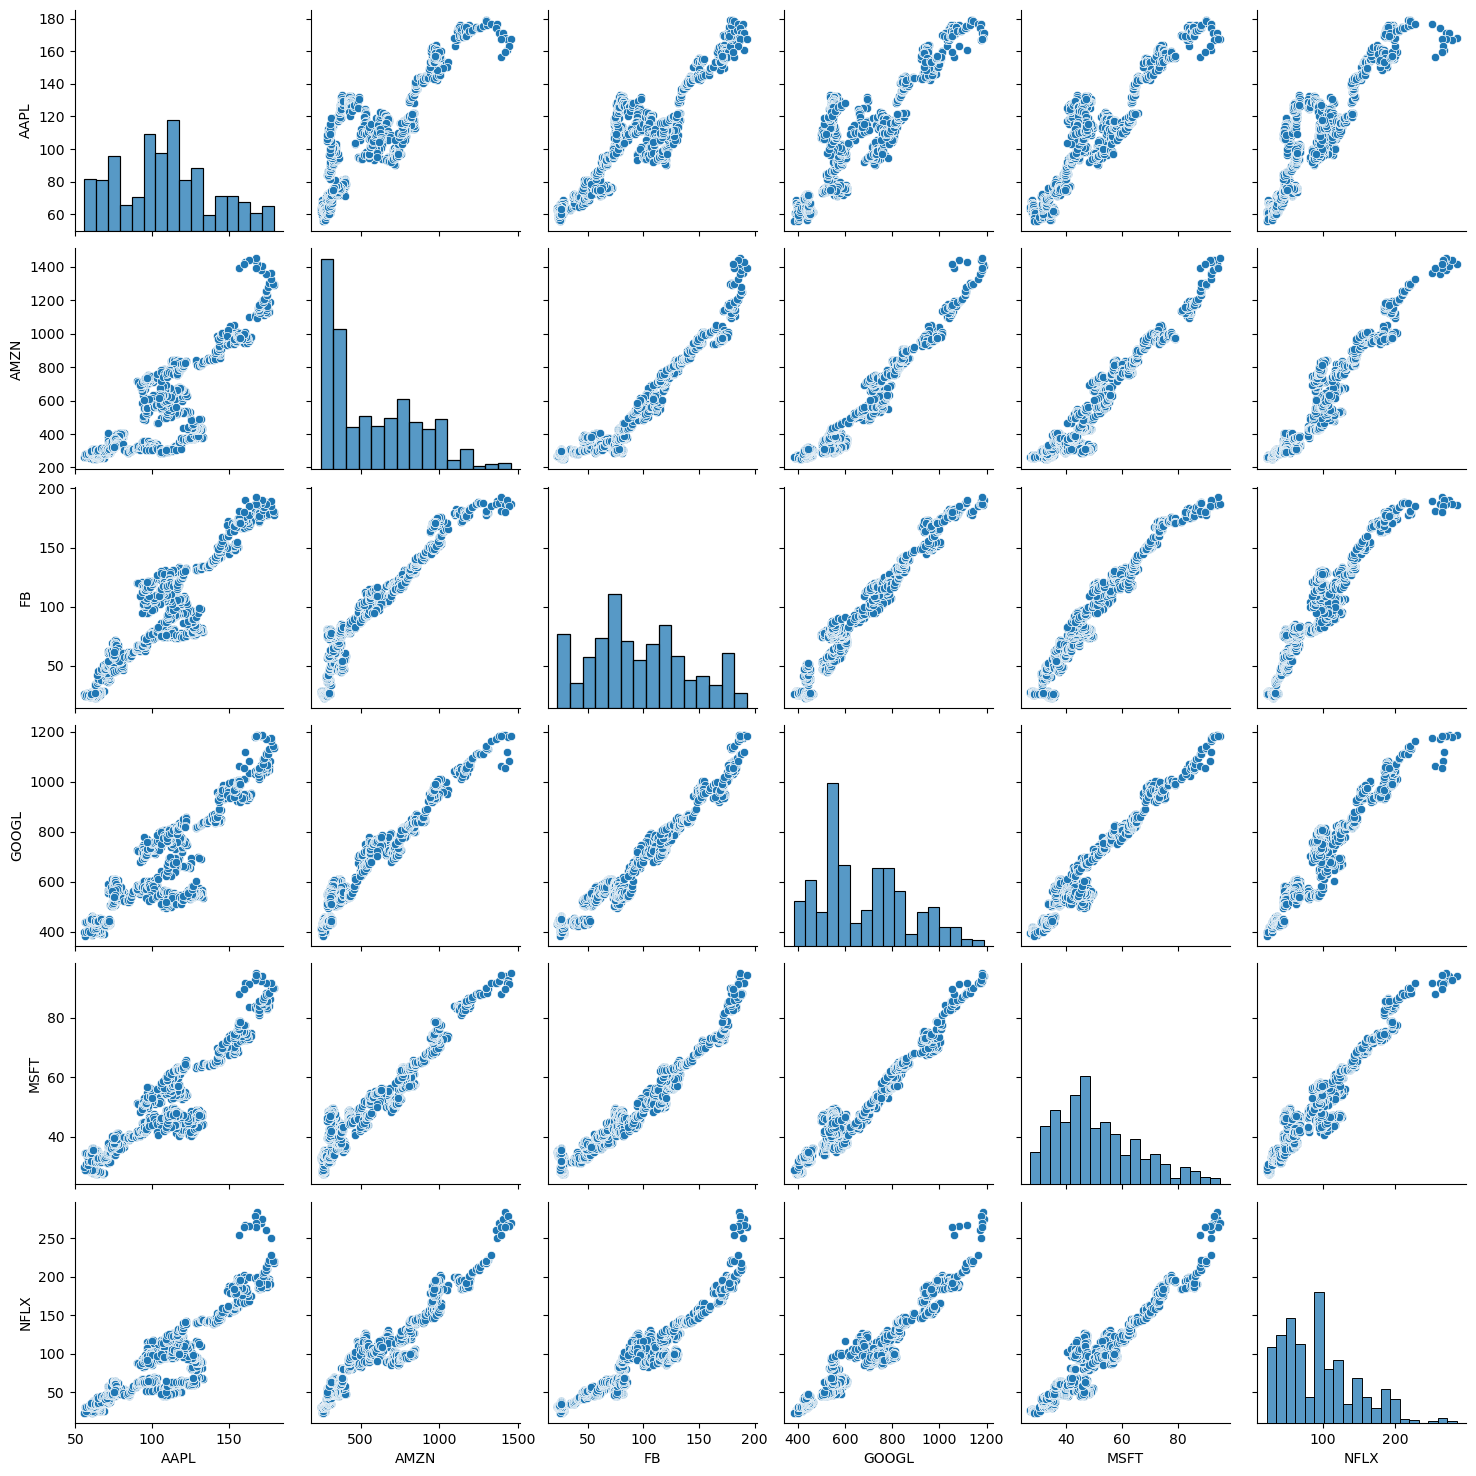

In [24]:
# Correlation

closing_prices = all_data.pivot(index='date', columns='Name', values='close')
sns.pairplot(closing_prices)
# sns.heatmap(closing_prices.corr(), annot=True)